In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
from copy import deepcopy

In [2]:
noise_scale = 100
number_of_samples = 50 
x = 25 *(np.random.rand(number_of_samples,1)-0.8)
y = 5*x + 20*x**2+1*x**3+noise_scale*np.random.randn(number_of_samples,1)

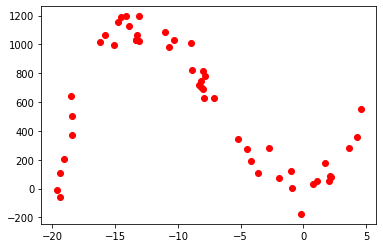

In [3]:
plt.plot(x,y,'ro')
plt.show()

In [4]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

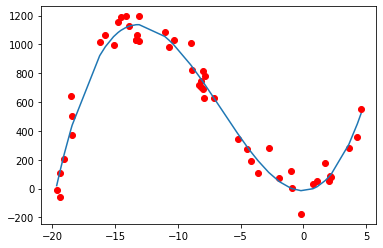

In [5]:
coeff = np.polyfit(x,y,3) 
poly = np.poly1d(coeff)

plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

--- 

In [6]:
coeff

array([  1.01504855,  20.14702686,   1.86554684, -14.6974717 ])

In [7]:
def createPopulation(size): 
    chromosomes = []
    for i in range(size): 
        chromosomes.append([random.randint(-50,50) for i in range(4)])
    return chromosomes 

In [8]:
def mutate(genes): 
    mutations = []
    mutations.append(genes)
    for _ in range(9): 
        new = deepcopy(genes)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0,1)
        
        new_num = round(rand_num * rand_float,2)
        new[rand_idx] = new_num
        
        mutations.append(new)
    return mutations

In [9]:
def cost(i, chromosome): 
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]


In [10]:
def fitness(chromosome): 
    '''
    Calculates the fitness of an individual's chromosome  
    '''
    i,j = 0,1 
    points = []
    while j < len(x): 
        y_og = cost(i, chromosome)
        y_new = cost(j, chromosome)
        badness = (y_og - y_new)**2 
        points.append((chromosome, round(badness)))
        
        genes = sorted(points, key = lambda x: float(x[1]), reverse = False)
        i+=1 
        j+=1 
    return genes[0]

In [11]:
def fitnessPopulation(population): 
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        scores = fitness(individual)
        bestGenes.append(scores)
        
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes 

In [12]:
def main(): 
    num_generations = 800
    bestGenes = []
    
    # create the starting population 
    population = createPopulation(100)

    # iterate through 500 generations 
    for i in range(num_generations): 
        print("Generation Number: " + str(i))
        new_population = []
        
        # find the top 10 best genes of the population 
        bestGenes = fitnessPopulation(population)
        
        for k in range(len(bestGenes)): 
            
            # add mutations to the best genes 
            newGenes = mutate(bestGenes[k][0])
            # add to new population 
            for j in newGenes: 
                new_population.append(j)
            
        # replace old population with new population 
        population = deepcopy(new_population)
    return population 

In [13]:
mostFit = main()

Generation Number: 0
Generation Number: 1
Generation Number: 2
Generation Number: 3
Generation Number: 4
Generation Number: 5
Generation Number: 6
Generation Number: 7
Generation Number: 8
Generation Number: 9
Generation Number: 10
Generation Number: 11
Generation Number: 12
Generation Number: 13
Generation Number: 14
Generation Number: 15
Generation Number: 16
Generation Number: 17
Generation Number: 18
Generation Number: 19
Generation Number: 20
Generation Number: 21
Generation Number: 22
Generation Number: 23
Generation Number: 24
Generation Number: 25
Generation Number: 26
Generation Number: 27
Generation Number: 28
Generation Number: 29
Generation Number: 30
Generation Number: 31
Generation Number: 32
Generation Number: 33
Generation Number: 34
Generation Number: 35
Generation Number: 36
Generation Number: 37
Generation Number: 38
Generation Number: 39
Generation Number: 40
Generation Number: 41
Generation Number: 42
Generation Number: 43
Generation Number: 44
Generation Number: 4

Generation Number: 367
Generation Number: 368
Generation Number: 369
Generation Number: 370
Generation Number: 371
Generation Number: 372
Generation Number: 373
Generation Number: 374
Generation Number: 375
Generation Number: 376
Generation Number: 377
Generation Number: 378
Generation Number: 379
Generation Number: 380
Generation Number: 381
Generation Number: 382
Generation Number: 383
Generation Number: 384
Generation Number: 385
Generation Number: 386
Generation Number: 387
Generation Number: 388
Generation Number: 389
Generation Number: 390
Generation Number: 391
Generation Number: 392
Generation Number: 393
Generation Number: 394
Generation Number: 395
Generation Number: 396
Generation Number: 397
Generation Number: 398
Generation Number: 399
Generation Number: 400
Generation Number: 401
Generation Number: 402
Generation Number: 403
Generation Number: 404
Generation Number: 405
Generation Number: 406
Generation Number: 407
Generation Number: 408
Generation Number: 409
Generation 

Generation Number: 725
Generation Number: 726
Generation Number: 727
Generation Number: 728
Generation Number: 729
Generation Number: 730
Generation Number: 731
Generation Number: 732
Generation Number: 733
Generation Number: 734
Generation Number: 735
Generation Number: 736
Generation Number: 737
Generation Number: 738
Generation Number: 739
Generation Number: 740
Generation Number: 741
Generation Number: 742
Generation Number: 743
Generation Number: 744
Generation Number: 745
Generation Number: 746
Generation Number: 747
Generation Number: 748
Generation Number: 749
Generation Number: 750
Generation Number: 751
Generation Number: 752
Generation Number: 753
Generation Number: 754
Generation Number: 755
Generation Number: 756
Generation Number: 757
Generation Number: 758
Generation Number: 759
Generation Number: 760
Generation Number: 761
Generation Number: 762
Generation Number: 763
Generation Number: 764
Generation Number: 765
Generation Number: 766
Generation Number: 767
Generation 

In [14]:
solution = fitnessPopulation(mostFit)[0][0]

In [15]:
solution

[1, 19, 38, 49]

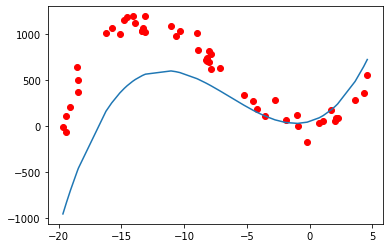

In [16]:
poly = np.poly1d(solution)
plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

In [17]:
poly(sortMe)

array([-956.02282352, -831.49007533, -830.99966141, -699.37672187,
       -491.03257886, -463.37780613, -457.73287394,  160.83062264,
        250.95967463,  359.73984115,  410.44400068,  439.40705367,
        485.80827273,  506.95657837,  548.91388365,  550.27211311,
        554.75655521,  562.7661771 ,  564.61880044,  599.79948768,
        592.04334321,  582.00402136,  516.51096365,  510.17167722,
        470.43070018,  462.75557941,  462.41219196,  451.06249764,
        450.52274058,  441.20854688,  436.77288125,  382.91246686,
        227.26858602,  172.76417964,  148.17619444,  111.1368695 ,
         67.57594533,   38.70538593,   29.12353388,   29.23757319,
         42.51004981,   89.72596116,  114.93443969,  178.75660617,
        214.21295034,  227.30872522,  240.87433411,  485.2494772 ,
        646.72068208,  724.15278755])